In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNetV2
import matplotlib.pyplot as plt

2023-03-05 23:05:37.415897: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-05 23:05:38.084127: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-05 23:05:38.084184: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-05 23:05:38.084192: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [3]:
IMG_SIZE = 64;
N_CHANNELS = 3;
ALPHA = 0.25;
batch_size = 32;

DL = np.array([
    #   R       G       B
    [ 0.298,  0.207,  0.208],  # L1
    [ 0.187,  0.286,  0.173],  # L2
    [-0.158,  0.189,  0.264],  # L3
    [-0.184, -0.271, -0.473],  # L4
])

In [12]:
def fix_dims(image, label):
    return tf.transpose(image) @ DL, label
def onehot(image, label):
    label = tf.one_hot(label, NUM_CLASSES)
    return image, label

In [13]:
NUM_CLASSES = 10;
size = (IMG_SIZE,IMG_SIZE);

ds_train = tf.data.Dataset.load("latent_train")
ds_test = tf.data.Dataset.load("latent_test")

ds_train = ds_train.map(fix_dims, num_parallel_calls=8)
ds_train = ds_train.map(onehot, num_parallel_calls=8)
ds_train = ds_train.batch(batch_size=batch_size, drop_remainder=True)

ds_test = ds_test.map(fix_dims, num_parallel_calls=8)
ds_test = ds_test.map(onehot, num_parallel_calls=8)
ds_test = ds_test.batch(batch_size=batch_size, drop_remainder=True)

ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

In [14]:
MBNet = MobileNetV2(
    include_top=True,
    weights=None,
    alpha=ALPHA,
    classes=10,
    input_shape=(IMG_SIZE,IMG_SIZE,N_CHANNELS),
)
model = MBNet
model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

In [15]:
print(model.layers[0].get_input_shape_at(0))
print(model.layers[-1].get_output_shape_at(0))
print(np.size(model.layers))

(None, 64, 64, 3)
(None, 10)
157


In [16]:
epochs = 20
hist = model.fit(ds_train, epochs=epochs, validation_data=ds_test, verbose=2)

Epoch 1/20
295/295 - 39s - loss: 2.3560 - accuracy: 0.1492 - val_loss: 2.3028 - val_accuracy: 0.0989 - 39s/epoch - 133ms/step
Epoch 2/20
295/295 - 15s - loss: 2.1151 - accuracy: 0.2405 - val_loss: 2.3069 - val_accuracy: 0.0989 - 15s/epoch - 50ms/step
Epoch 3/20
295/295 - 15s - loss: 1.9577 - accuracy: 0.3148 - val_loss: 2.3294 - val_accuracy: 0.0989 - 15s/epoch - 50ms/step
Epoch 4/20
295/295 - 15s - loss: 1.8542 - accuracy: 0.3541 - val_loss: 2.3572 - val_accuracy: 0.0989 - 15s/epoch - 50ms/step
Epoch 5/20
295/295 - 15s - loss: 1.7848 - accuracy: 0.3804 - val_loss: 2.3858 - val_accuracy: 0.0989 - 15s/epoch - 51ms/step
Epoch 6/20
295/295 - 15s - loss: 1.6984 - accuracy: 0.4175 - val_loss: 2.4255 - val_accuracy: 0.0989 - 15s/epoch - 51ms/step
Epoch 7/20
295/295 - 15s - loss: 1.6042 - accuracy: 0.4500 - val_loss: 2.4339 - val_accuracy: 0.0989 - 15s/epoch - 51ms/step
Epoch 8/20
295/295 - 15s - loss: 1.5208 - accuracy: 0.4857 - val_loss: 2.4602 - val_accuracy: 0.0989 - 15s/epoch - 51ms/step

Text(0, 0.5, 'Accuracy')

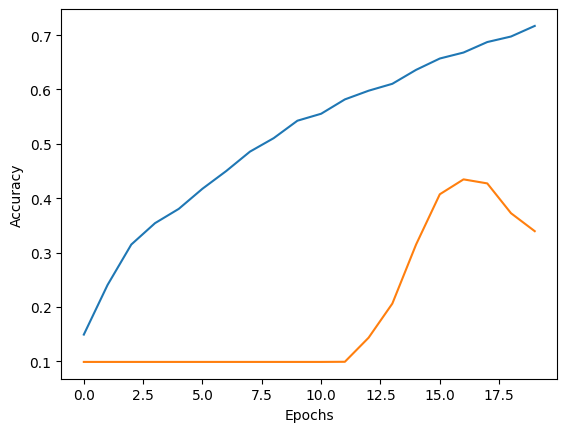

In [17]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [19]:
model.summary(layer_range=['input_1','input_1'])

Model: "mobilenetv2_0.25_64"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
Total params: 261,578
Trainable params: 250,922
Non-trainable params: 10,656
__________________________________________________________________________________________________
